In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('Super_Store.csv', encoding ='unicode_escape')
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [3]:
dataset['Sub-Category'].nunique()

4

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [5]:
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])

In [6]:
print(dataset['Order Date'].min())
print(dataset['Order Date'].max())

2014-01-06 00:00:00
2017-12-30 00:00:00


In [7]:
dataset.sort_values('Order Date', inplace=True)

In [8]:
dataset.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1619,7637,US-2017-158526,2017-12-29,1/1/2018,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,40214,South,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,258.750,3,0.0,77.6250
1617,7633,US-2017-158526,2017-12-29,1/1/2018,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,40214,South,FUR-CH-10002602,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,1207.840,8,0.0,314.0384
1057,5132,CA-2017-146626,2017-12-29,1/5/2018,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Anaheim,...,92804,West,FUR-FU-10002501,Furniture,Furnishings,Nu-Dell Executive Frame,101.120,8,0.0,37.4144
1618,7636,US-2017-158526,2017-12-29,1/1/2018,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,40214,South,FUR-CH-10004495,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842
186,907,CA-2017-143259,2017-12-30,1/3/2018,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176


In [9]:
dataset['Sub-Category'].value_counts()

Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub-Category, dtype: int64

In [15]:
dataset1 = dataset.loc[dataset['Sub-Category']=='Furnishings']

In [16]:
dataset1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1626,7661,CA-2014-105417,2014-01-07,1/12/2014,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
181,867,CA-2014-149020,2014-01-10,1/15/2014,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
150,717,CA-2014-130092,2014-01-11,1/14/2014,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
200,971,CA-2014-115791,2014-01-16,1/18/2014,Second Class,DL-13315,Delfina Latchford,Consumer,United States,Philadelphia,...,19134,East,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,127.104,6,0.2,28.5984
1326,6328,CA-2014-167927,2014-01-20,1/26/2014,Standard Class,XP-21865,Xylona Preis,Consumer,United States,Westland,...,48185,Central,FUR-FU-10002918,Furniture,Furnishings,Eldon ClusterMat Chair Mat with Cordless Antis...,272.940,3,0.0,30.0234


In [17]:
print(dataset1['Order Date'].min())
print(dataset1['Order Date'].max())

2014-01-07 00:00:00
2017-12-29 00:00:00


In [18]:
dataset1.sort_values('Order Date', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18116\4174174091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1.sort_values('Order Date', inplace=True)


In [19]:
dataset1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1626,7661,CA-2014-105417,2014-01-07,1/12/2014,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
181,867,CA-2014-149020,2014-01-10,1/15/2014,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
150,717,CA-2014-130092,2014-01-11,1/14/2014,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
200,971,CA-2014-115791,2014-01-16,1/18/2014,Second Class,DL-13315,Delfina Latchford,Consumer,United States,Philadelphia,...,19134,East,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,127.104,6,0.2,28.5984
1326,6328,CA-2014-167927,2014-01-20,1/26/2014,Standard Class,XP-21865,Xylona Preis,Consumer,United States,Westland,...,48185,Central,FUR-FU-10002918,Furniture,Furnishings,Eldon ClusterMat Chair Mat with Cordless Antis...,272.940,3,0.0,30.0234


In [20]:
dataset1 = dataset1[['Order Date','Sales']]

In [21]:
dataset1

,Order Date,Sales
1626,2014-01-07,76.728
181,2014-01-10,51.940
150,2014-01-11,9.940
200,2014-01-16,127.104
1326,2014-01-20,272.940
...,...,...
1436,2017-12-28,7.968
1438,2017-12-28,2.960
504,2017-12-28,7.400
1128,2017-12-29,68.460


In [22]:
dataset1 = dataset1.groupby('Order Date')['Sales'].sum().reset_index()

In [28]:
dataset1.head(20)

,Sales
Order Date,
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-16,127.104
2014-01-20,345.570
2014-01-21,25.248
2014-01-26,75.240
2014-02-08,14.560
2014-02-11,332.940


In [24]:
dataset1 = dataset1.set_index('Order Date')
dataset1.head()

,Sales
Order Date,
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-16,127.104
2014-01-20,345.570


In [25]:
y = dataset1['Sales'].resample('MS').mean()

In [26]:
y['2014']

Order Date
2014-01-01    101.681429
2014-02-01     98.245000
2014-03-01     68.589714
2014-04-01     98.404600
2014-05-01    111.452286
2014-06-01     54.093750
2014-07-01    112.827750
2014-08-01     99.775800
2014-09-01    148.047800
2014-10-01     69.090222
2014-11-01    137.986778
2014-12-01    148.391714
Freq: MS, Name: Sales, dtype: float64

In [27]:
y['2015']

Order Date
2015-01-01    254.022800
2015-02-01    103.052000
2015-03-01    143.595800
2015-04-01    299.318800
2015-05-01    127.682833
2015-06-01    178.351857
2015-07-01    132.555636
2015-08-01     72.750182
2015-09-01    137.476500
2015-10-01     77.095000
2015-11-01    186.835684
2015-12-01    140.589000
Freq: MS, Name: Sales, dtype: float64

<AxesSubplot:xlabel='Order Date'>

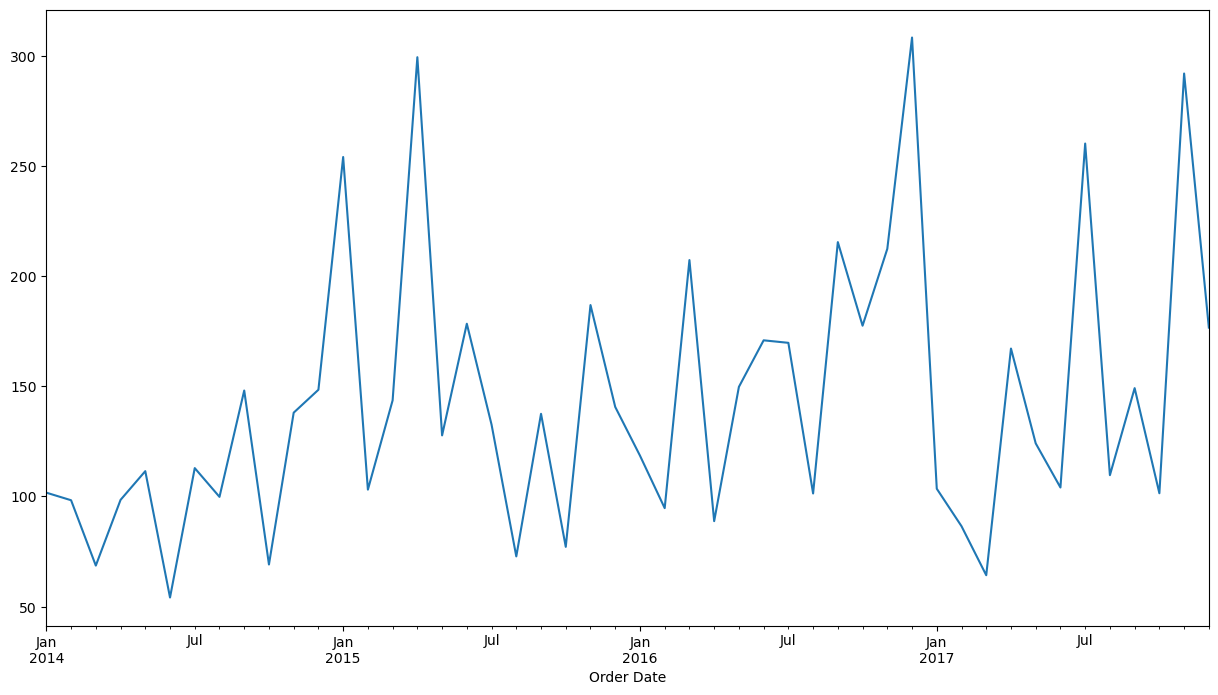

In [29]:
y.plot(figsize=(15,8))

<IPython.core.display.Javascript object>

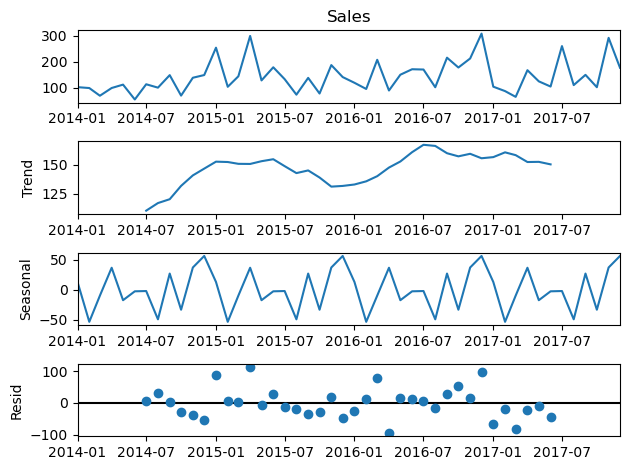

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(y)
decompose.plot()
plt.show()

In [31]:
# durbin watson test
import statsmodels.api as sm
sm.stats.durbin_watson(y)

0.3088162986591814

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
adfuller(y)

(-6.582724497269473,
 7.444389290815569e-09,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 415.98260415803935)

In [35]:
y.head()

Order Date
2014-01-01    101.681429
2014-02-01     98.245000
2014-03-01     68.589714
2014-04-01     98.404600
2014-05-01    111.452286
Freq: MS, Name: Sales, dtype: float64

# 4th Oct 2023 - Forecasting and Prediction the Furniture Sales

In [10]:
# Dimension of the dataset
dataset.shape

(2121, 21)

In [11]:
dataset.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 1577 to 186
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   object        
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121

In [13]:
dataset['Order Date'].min(), dataset['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [14]:
dataset.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [15]:
# we remove the columns that we don't need as well as check missing value

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

dataset.drop(cols, axis=1, inplace=True)
Furniture = dataset.sort_values('Order Date')
Furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [16]:
Furniture

,Order Date,Sales
1577,2014-01-06,2573.820
1626,2014-01-07,76.728
181,2014-01-10,51.940
150,2014-01-11,9.940
631,2014-01-13,545.940
...,...,...
1618,2017-12-29,300.980
1128,2017-12-29,68.460
393,2017-12-29,393.568
1619,2017-12-29,258.750


In [17]:
# Aggregate Sales data by date

furniture = Furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [19]:
furniture.head(20)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [20]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  889 non-null    datetime64[ns]
 1   Sales       889 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.0 KB


In [21]:
# Indexing with the Time Series Data

#furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture.set_index('Order Date', inplace=True)
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [22]:
y = furniture['Sales'].resample('MS').mean()

In [23]:
y['2014']

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
Freq: MS, Name: Sales, dtype: float64

In [24]:
y['2015']

Order Date
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
Freq: MS, Name: Sales, dtype: float64

In [25]:
y['2016']

Order Date
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
Freq: MS, Name: Sales, dtype: float64

In [26]:
y['2017']

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

<IPython.core.display.Javascript object>

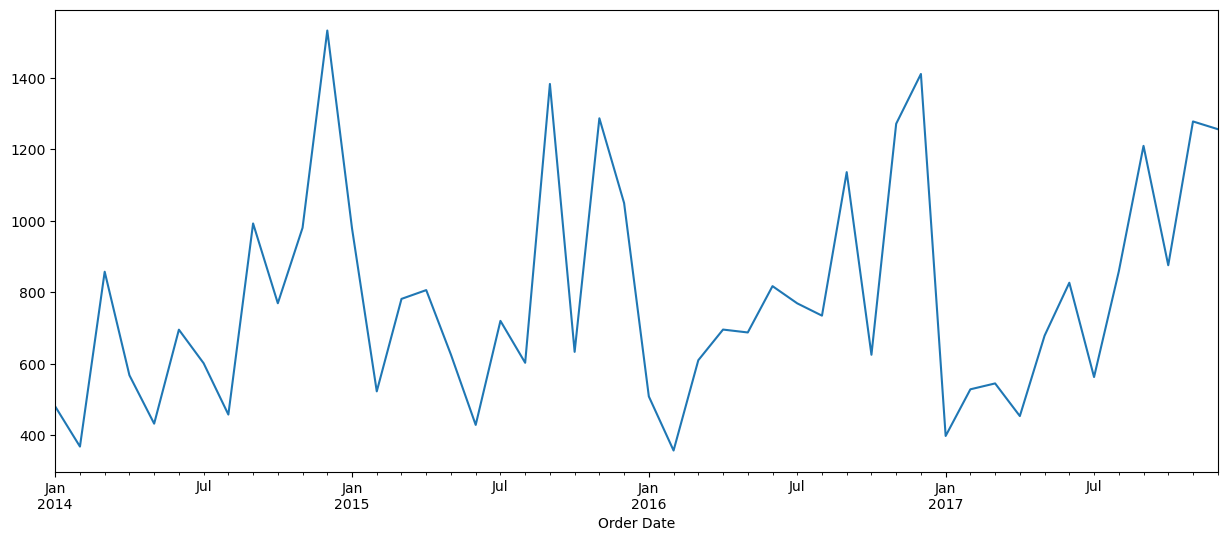

In [27]:
y.plot(figsize=(15,6))
plt.show()

# Check data Stationarity

In [29]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print("ADF Statistic : %f" % result[0])
print("p-value : %f" % result[1])
print('Critical Values: ')
for key, value in result[4].items():
    print('\t%s : %.3f ' % (key, value))

ADF Statistic : -5.191070
p-value : 0.000009
Critical Values: 
	1% : -3.621 
	5% : -2.944 
	10% : -2.610 


# Decomposition 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

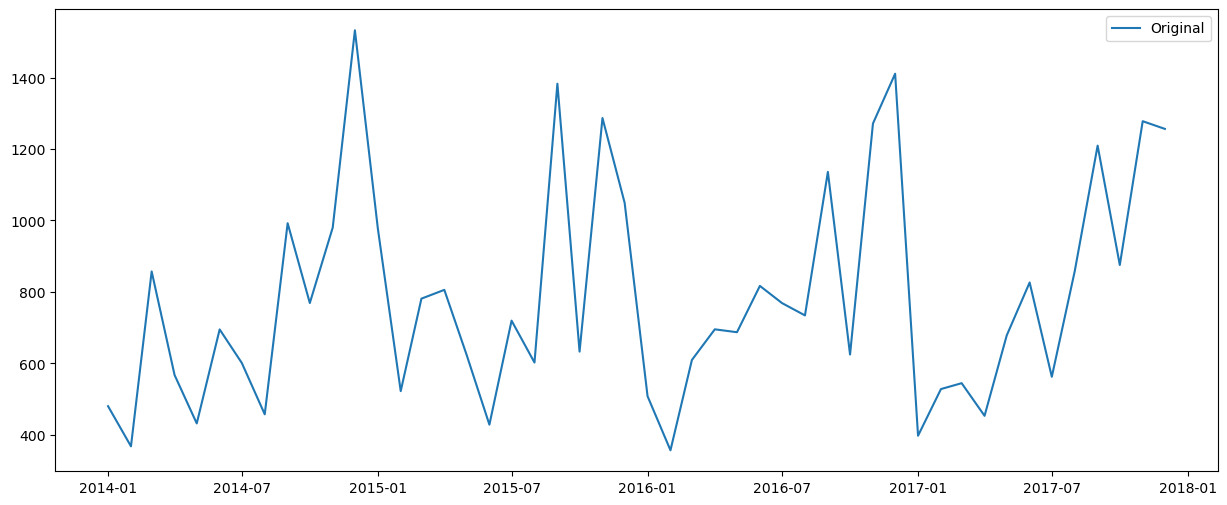

<Figure size 1500x600 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

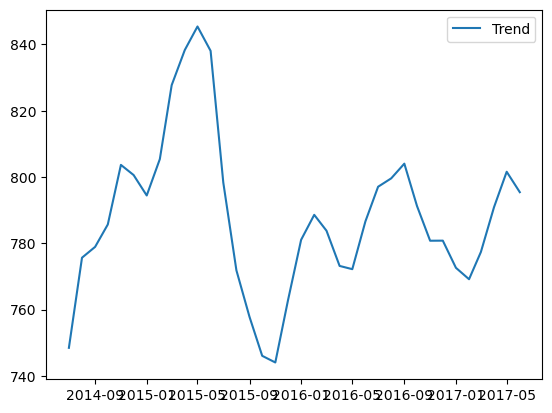

<Figure size 1500x600 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

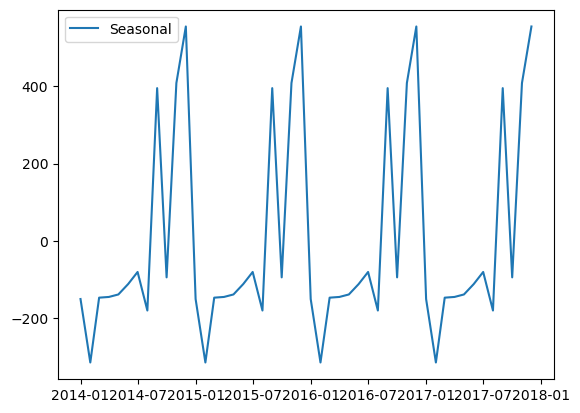

<Figure size 1500x600 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

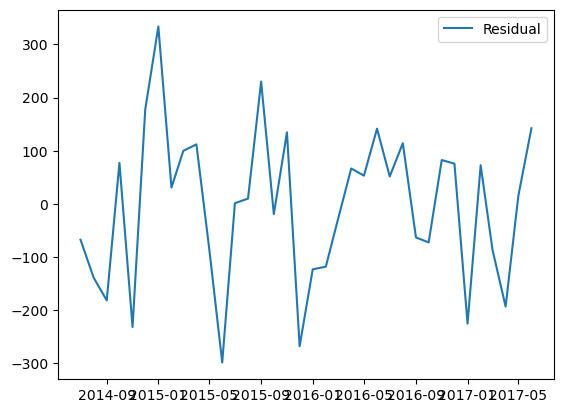

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.figure(figsize=(15,6))
plt.plot(y, label='Original')
plt.legend(loc ='best')

plt.figure(figsize=(15,6))
trend = decomposition.trend
plt.show()
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.figure(figsize=(15,6))
seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.figure(figsize=(15,6))
residual = decomposition.resid
plt.show()
plt.plot(residual, label='Residual')
plt.legend(loc='best')

In [35]:
# Time Series Forecasting Using SARIMA Model (Trend and Seasonality)
# p, d, q

import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print("Examples of parameter combinations for seasonal ARIMA Model.....")
print('SARIMA : {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMA : {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMA : {} x {}'.format(pdq[2], seasonal_pdq[1]))
print('SARIMA : {} x {}'.format(pdq[2], seasonal_pdq[2]))

Examples of parameter combinations for seasonal ARIMA Model.....
SARIMA : (0, 0, 1) x (0, 0, 1, 12)
SARIMA : (0, 0, 1) x (0, 1, 0, 12)
SARIMA : (0, 1, 0) x (0, 0, 1, 12)
SARIMA : (0, 1, 0) x (0, 1, 0, 12)


In [36]:
# Best Parameter Selection - grid search

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

from pylab import rcParams

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
    

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1216.2154563696226
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130919128
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793718
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1214.7515100311498
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.00471991163414
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280301486
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758095


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2706.359293331021
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091534
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.62613896732944


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.6073267798422


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2436.4502892679598
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946865


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576434421
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1403.7063380247494
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.6378567222305
SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.9671228167958
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.7889663004408


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1005.2231367298109
SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109212
SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.91132001514876
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.905617681721


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2483.5714015355948
SARIMAX(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482889


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.58062333322187
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442648


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2257.732183881262
SARIMAX(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.7574368417399


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.5576621461237
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067713


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1593.5601835130215
SARIMAX(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.4632147852136
SARIMAX(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.20776751609543
SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.92593679352007


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1053.1944075697438
SARIMAX(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084573


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.58426921438354
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442186345


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(1, 0, 1)x(0, 0, 1, 12)12 - AIC:586.2531594477715
SARIMAX(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195815024
SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.34221939659454
SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238771916


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2435.181455412302
SARIMAX(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002118103


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.75131881203356
SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1261.8554376696293
SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281134
SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.21306116191033
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658784968
SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1008.976943072009
SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345398


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.326499251303
SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019834963


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1334.0598845754253
SARIMAX(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.47626876100105


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.38730069393944
SARIMAX(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546608773


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2178.2449771028664
SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.7875439548082


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.36610143706497


In [ ]:
# SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.36610143706497
# SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.58062333322187
# SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.5576621461237

# Fitting the SARIMAX Model

In [38]:
mod = sm.tsa.statespace.SARIMAX(y, order=(0,1,1), seasonal_order=(0,1,1,12),
                                           enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()
print(results.summary())

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -136.790
Date:                            Wed, 04 Oct 2023   AIC                            279.581
Time:                                    21:57:03   BIC                            282.714
Sample:                                01-01-2014   HQIC                           280.261
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   4146.151     -0.000      1.000   -8127.307    8125.307
ma.S.L12      -3.2470      1.671   

# Validating Forecasts

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

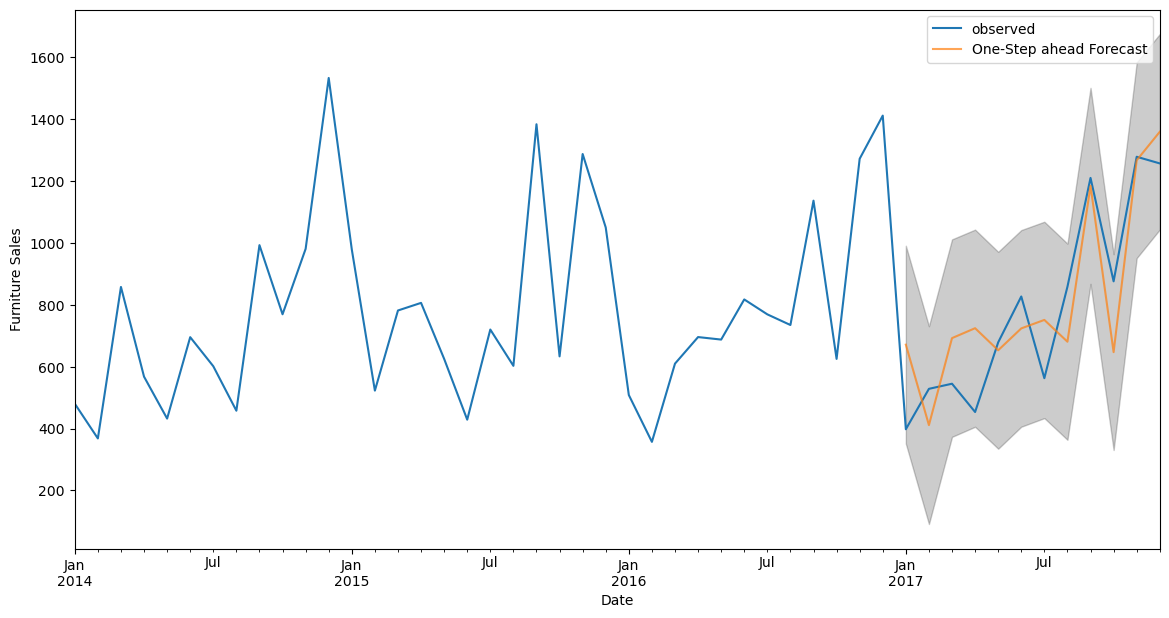

In [39]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-Step ahead Forecast', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# Calculating RMSE to check overall error

In [43]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth)**2).mean()
mape = (((y_forecasted - y_truth)/(y_truth)).mean())*100
print("The Root Mean Squared Error of our Forecasts is {}".format(round(np.sqrt(mse),2)))
print("MAPE is {}".format(round(mape),2))

The Root Mean Squared Error of our Forecasts is 164.59
MAPE is 9


# Visualizing the Forecast value

            lower Sales  upper Sales
2018-01-01   169.635509   800.791317
2018-02-01   184.857053   816.402416
2018-03-01   280.604382   912.149015
2018-04-01   229.753450   861.298083
2018-05-01   368.004662   999.549295
2018-06-01   491.916378  1123.461012
2018-07-01   316.102015   947.646648
2018-08-01   501.564300  1133.108934
2018-09-01   897.528882  1529.073516
2018-10-01   500.578198  1132.122832
2018-11-01   967.036462  1598.581096
2018-12-01   980.347103  1611.891762
2019-01-01   104.210467   885.322812
2019-02-01   119.299208   901.066713
2019-03-01   215.046673   996.813177
2019-04-01   164.195741   945.962245
2019-05-01   302.446953  1084.213456
2019-06-01   426.358670  1208.125173
2019-07-01   250.544306  1032.310809
2019-08-01   436.006592  1217.773095
2019-09-01   831.971173  1613.737677
2019-10-01   435.020490  1216.786993
2019-11-01   901.478754  1683.245257
2019-12-01   914.789376  1696.555942
2020-01-01    46.957309   961.682423
2020-02-01    61.948569   977.523805
2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

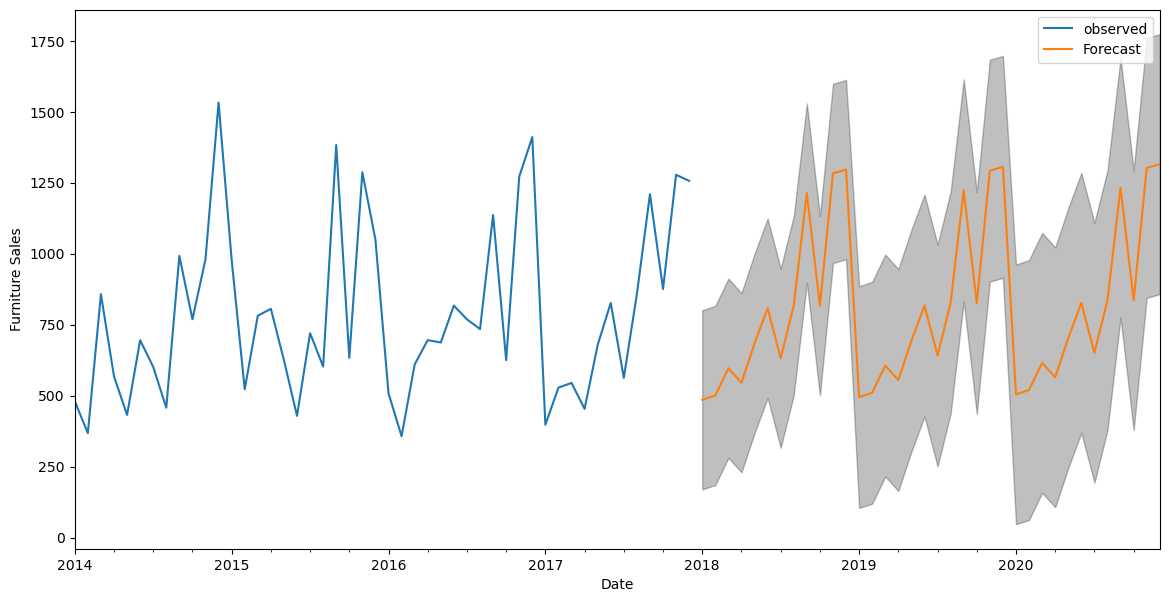

In [45]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=[14,7])
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, 
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()